In [1]:
#v.0.0.0.6 GEMATRON
# TAROT
#fixed search results

from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from torch.nn.functional import softmax
import secrets
import matplotlib.pyplot as plt
import numpy as np
import unittest
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# v0.0.0.5 imports
from langchain.memory import ConversationEntityMemory
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from playwright.async_api import async_playwright
from langchain.llms import OpenAI
from bs4 import BeautifulSoup
import urllib.parse
import asyncio
import hashlib
import urllib
import torch
import re
import os
import time
from PIL import Image as PILImage

os.environ["TOKENIZERS_PARALLELISM"] = "false"

model_name = "gpt2-medium"
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gpt2_model = GPT2LMHeadModel.from_pretrained(model_name)





# Load pre-trained model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2) # Assuming binary sentiment






Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


checking heart...
HEART IN GOOD CONDITION
Enter your text: is utopia a good show?
Got input: is utopia a good show?
Tokenizing input...
Tokenized input: tensor([[  271,  3384, 24464,   257,   922,   905,    30]])
Web search results: HOME
>
UTOPIA

Utopia (2020 - 2020)
UTOPIA
SERIES INFO

A group of young adults get a hold of a cult underground graphic novel, which burdens them with the dangerous task of saving the world.

Creator: Gillian Flynn
Starring: John Cusack, Rainn Wilson, Sasha Lane, Dan Byrd, Cory Michael Smith
TV Network: Prime Video
Premiere Date: Sep 25, 2020
Genre: Drama
Executive producer: Gillian Flynn
WHERE TO WATCH UTOPIA
Subscription
Season 1

Watch Utopia for free on Amazon Prime Video.

RATE AND REVIEW
WANT TO SEE
UTOPIA VIDEOS
UTOPIA: SEASON 1 TRAILER
Utopia: Season 1 Trailer
TRAILER 1:58
UTOPIA: SEASON 1 COMIC-CON TRAILER
Utopia: Season 1 Comic-Con Trailer
TRAILER 1:00
View All Videos
UTOPIA  PHOTOS
See all photos
SEASONS
CAST & CREW

John Cusack

Dr. Kevin Chris

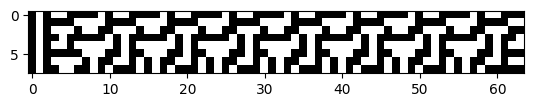

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


7-Character Key: bc3c3c3
7. Generating GPT-2 response...
GPT-2 Output: bc3c3c3 HOME
>
UTOPIA

Utopia (2020 - 2020)
UTOPIA

UTOPIA

UTOPIA

UTOPIA

UTOPIA

UTOP
Calculating gematria...
Gematria: B: 2, C: 3, C: 3, C: 3, H: 8, O: 60, M: 40, E: 5, U: 300, T: 200, O: 60, P: 70, I: 9, A: 1, U: 300, T: 200, O: 60, P: 70, I: 9, A: 1, U: 300, T: 200, O: 60, P: 70, I: 9, A: 1, U: 300, T: 200, O: 60, P: 70, I: 9, A: 1, U: 300, T: 200, O: 60, P: 70, I: 9, A: 1, U: 300, T: 200, O: 60, P: 70, I: 9, A: 1, U: 300, T: 200, O: 60, P: 70, I: 9, A: 1, U: 300, T: 200, O: 60, P: 70 | Total: 5234
Looking up gematria value on gematrix.org...
Gematrix.org Result:  5234
Value of Gematria 5234
 Results by Jewish Gematria
Word	Jewish	English	Simple	Searches
Official Anoucment Of Gesara V Tree On July Fourteen Twenty Tree	5234	3990	665	75
Jesus Christ Does Not Rule Over Hades But He Does Have Full Authority	5234	4314	719	72
Any Way Kep Thinking Its All A Joke Retarded Dogs The Aliens Are Not Afraid Of Any Of You	5

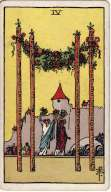

Card Name: minor_arcana_wands_4_thumb
Sentiment Score: 0.13376986980438232


In [16]:
#v0.0.0.7 beta - HEART

import requests

def check_heartbeat():
    heartbeat_url = "http://127.0.0.1:8000/heart_beat/"
    try:
        response = requests.get(heartbeat_url)
        if response.status_code == 200:
            return True
        else:
            return False
    except Exception as e:
        print(f"Error checking heartbeat: {e}")
        return False




RULE = {(1, 1, 1): 0, (1, 1, 0): 0, (1, 0, 1): 0, (1, 0, 0): 1, (0, 1, 1): 1, (0, 1, 0): 1, (0, 0, 1): 1, (0, 0, 0): 0}

def rule_30(current_generation, generations=7):
    key_binary = ""
    # We'll save all generations in a list for the visualization
    all_generations = [current_generation]
    for _ in range(generations):
        next_generation = []
        for i in range(len(current_generation)):
            left = current_generation[i - 1] if i > 0 else 0
            center = current_generation[i]
            right = current_generation[(i + 1) % len(current_generation)]
            next_generation.append(RULE[(left, center, right)])
        key_binary += ''.join(map(str, next_generation))
        all_generations.append(next_generation) # Save the generation
        current_generation = next_generation

    # Visualization of the automaton
    plt.imshow(np.array(all_generations), cmap="binary", interpolation="none")
    plt.show()

    key_hex = hex(int(key_binary[:28], 2))[2:].zfill(7)
    return key_hex


# define search function



import urllib.parse
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup




async def fetch_search_results(query, max_results=20):
    content = ""
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        search_url = f"https://www.bing.com/search?q={urllib.parse.quote(query)}&PC=U316&FORM=CHROMN"
        await page.goto(search_url)
        await page.wait_for_selector(".b_algo")

        # Loop through the search results
        for i in range(max_results):
            link_element = await page.query_selector(f".b_algo:nth-child({i + 1}) h2 a")

            # If there's no link found, continue to next iteration
            if not link_element:
                continue

            link = await link_element.get_attribute("href")
            await page.goto(link)

            # Get the content of the <main> element, and if not found, get the content of the <body> element
            main_content_element = await page.query_selector("main") or await page.query_selector("body")
            content = await main_content_element.inner_text() if main_content_element else ""

            if content:
                break

        await browser.close()
        return content if content else "No suitable content found. The application will not proceed."


        

    
def generate_gpt2_response(seed_text, max_length=512, temperature=1.5, num_return_sequences=1):
    """
    Generates a response using the GPT-2 model.
    
    Parameters:
        seed_text (str): The seed text for generation.
        max_length (int): The maximum length of the generated text.
        temperature (float): The temperature for controlling randomness in generation.
        num_return_sequences (int): The number of sequences to return.
    
    Returns:
        str: The generated text or an error message.
    """

    # Validate inputs
    if not seed_text or max_length <= 0 or temperature <= 0 or num_return_sequences <= 0:
        return "Invalid parameters. Check your inputs."

    try:
        input_ids = gpt2_tokenizer.encode(seed_text, return_tensors="pt")
        output = gpt2_model.generate(input_ids, max_length=max_length, num_return_sequences=num_return_sequences, temperature=temperature)
        generated_text = gpt2_tokenizer.decode(output[0], skip_special_tokens=True)

        # Check if the generated text is the same as the seed text
        if generated_text.strip() == seed_text.strip():
            return "Generated text is the same as seed. Try again."

        return generated_text
    except Exception as e:
        return str(e)


#gematria script translation

def simple_gematria_with_total(word):
    word = word.upper()
    
    # Define the gematria mapping for English gematria
    gematria_mapping = {
        'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9,
        'J': 10, 'K': 20, 'L': 30, 'M': 40, 'N': 50, 'O': 60, 'P': 70, 'Q': 80, 'R': 90,
        'S': 100, 'T': 200, 'U': 300, 'V': 400, 'W': 500, 'X': 600, 'Y': 700, 'Z': 800
    }
    
    results, total = [], 0
    for letter in word:
        if letter in gematria_mapping:
            results.append((letter, gematria_mapping[letter]))
            total += gematria_mapping[letter]
    return results, total

async def gematria_lookup(number):
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        lookup_url = f"https://www.gematrix.org/?word={number}"
        await page.goto(lookup_url)

        # Extract content from the page
        content_element = await page.query_selector("body")
        if content_element:
            full_content = await content_element.inner_text()
            target_text = "Gematria Words And Phrases Of"
            target_index = full_content.find(target_text)
            if target_index != -1:
                content = full_content[target_index + len(target_text):]
            else:
                content = "Target text not found"
        else:
            content = "Body element not found"

        await browser.close()
        return content
    
    

    
    


async def main():
    print("checking heart...")
    if not check_heartbeat():
        print("Heartbeat not detected. The application will not proceed.")
        return
    else:
        print("HEART IN GOOD CONDITION")

    
    # Initialize the tokenizer
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    

    # 1. Get an input by the user, as text.
    text = input("Enter your text: ").strip()
    print(f"Got input: {text}")

    # 2. Tokenize the input using the GPT2 tokenizer from Transformers
    print("Tokenizing input...")
    inputs = gpt2_tokenizer.encode(text, return_tensors="pt", max_length=50, truncation=True)
    max_length = 50
    print(f"Tokenized input: {inputs}")

    # 3. Do the web search with the terms.
    search_results = await fetch_search_results(text)
    print(f"Web search results: {search_results}")

    # 4. Get the data from the search’s tokenise the data.
    print("Tokenizing first search result...")
    search_result_text = search_results if search_results else ""
    search_result_tokenized = gpt2_tokenizer.encode(search_result_text, return_tensors="pt")

    # 5. Pass the tokenized data to the cellular automata as seed.
    print("Creating seed for cellular automata...")
    hash_object = hashlib.md5(search_result_text.encode())
    hex_dig = hash_object.hexdigest()
    seed_value = int(hex_dig, 16) % 256
    pattern = [int(b) for b in format(seed_value, '08b')] * 8

    # 6. Get the result from automata.
    print("Running cellular automata...")
    key = rule_30(pattern)
    print(f"7-Character Key: {key}")

    # 7. Turn both data into a seed back into as many words as the seed allows using the language model.
    print("7. Generating GPT-2 response...")
    combined_seed = f"{key} {gpt2_tokenizer.decode(search_result_tokenized[0])}"[:max_length]
    response_from_gpt2 = generate_gpt2_response(combined_seed, max_length)
    print(f"GPT-2 Output: {response_from_gpt2}")

    # 8. Turn the words into gematria number.
    print("Calculating gematria...")
    gematria_values, total_value = simple_gematria_with_total(response_from_gpt2)
    if gematria_values:
        gematria_formula = ", ".join([f"{pair[0]}: {pair[1]}" for pair in gematria_values])
        print(f"Gematria: {gematria_formula} | Total: {total_value}")

        # 9. Lookup the gematria number on gematrix.org
        print("Looking up gematria value on gematrix.org...")
        gematrix_result = await gematria_lookup(total_value)
        print(f"Gematrix.org Result: {gematrix_result}")
    else:
        print(" Gematria: No valid letters found.")
        
     # Directory path
    dir_path = './tarot'
    images = os.listdir(dir_path)
    
    
    # use total_value as tarot draw seed
    secretsGenerator = secrets.SystemRandom()
    secretsGenerator.seed(total_value)

    # Utilize CSPRNG
    # rng = random.SystemRandom()
    # selected_card = rng.choice(images)
    selected_card = secretsGenerator.choice(images)


    # Open and display the selected image
    image_path = os.path.join(dir_path, selected_card)
    image = PILImage.open(image_path)
    display(image)

    # Output the card name
    card_name = os.path.splitext(selected_card)[0]
    print('Card Name:', card_name)
    
    #sentiment score 
    #sia = SentimentIntensityAnalyzer()
    #sentiment_result = sia.polarity_scores(gematrix_result)
    #sentiment_score = sentiment_result['compound']
    #print(f"Gematria Sentiment Score: {sentiment_score}")



    # Tokenize the input
    inputs = tokenizer(gematrix_result, return_tensors="pt", max_length=512, truncation=True)

    # Predict the sentiment
    outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=-1)

    # Get the sentiment score; the result will depend on how the model was fine-tuned
    sentiment_score = probs[0][1].item() - probs[0][0].item()

    print(f"Sentiment Score: {sentiment_score}")



await main()

Enter your text: ble
Got input: ble
Tokenizing input...
Tokenized input: tensor([[903]])


Token indices sequence length is longer than the specified maximum sequence length for this model (7381 > 1024). Running this sequence through the model will result in indexing errors


Web search results: Bluetooth Low Energy
23 languages
Article
Talk
Read
Edit
View history
Tools
From Wikipedia, the free encyclopedia

Bluetooth Low Energy (Bluetooth LE, colloquially BLE, formerly marketed as Bluetooth Smart[1]) is a wireless personal area network technology designed and marketed by the Bluetooth Special Interest Group (Bluetooth SIG)[2] aimed at novel applications in the healthcare, fitness, beacons,[3] security, and home entertainment industries.[4] It is independent of classic Bluetooth[clarification needed] and has no compatibility, but Bluetooth Basic Rate/Enhanced Data Rate (BR/EDR) and LE can coexist. The original specification was developed by Nokia in 2006 under the name Wibree,[5] which was integrated into Bluetooth 4.0 in December 2009 as Bluetooth Low Energy.

Compared to Classic Bluetooth, Bluetooth Low Energy is intended to provide considerably reduced power consumption and cost while maintaining a similar communication range. Mobile operating systems in

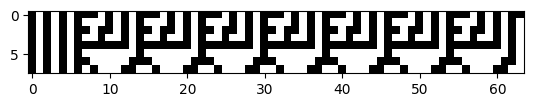

7-Character Key: aa2a2a2
7. Generating GPT-2 response...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GPT-2 Output: aa2a2a2 Bluetooth Low Energy
23 languages
Article

http://www.youtube.com/watch?v=qZJ_Z_Z_Z_g

http://www.youtube.com/watch
Calculating gematria...
Gematria: A: 1, A: 1, A: 1, A: 1, B: 2, L: 30, U: 300, E: 5, T: 200, O: 60, O: 60, T: 200, H: 8, L: 30, O: 60, W: 500, E: 5, N: 50, E: 5, R: 90, G: 7, Y: 700, L: 30, A: 1, N: 50, G: 7, U: 300, A: 1, G: 7, E: 5, S: 100, A: 1, R: 90, T: 200, I: 9, C: 3, L: 30, E: 5, H: 8, T: 200, T: 200, P: 70, W: 500, W: 500, W: 500, Y: 700, O: 60, U: 300, T: 200, U: 300, B: 2, E: 5, C: 3, O: 60, M: 40, W: 500, A: 1, T: 200, C: 3, H: 8, V: 400, Q: 80, Z: 800, J: 10, Z: 800, Z: 800, Z: 800, G: 7, H: 8, T: 200, T: 200, P: 70, W: 500, W: 500, W: 500, Y: 700, O: 60, U: 300, T: 200, U: 300, B: 2, E: 5, C: 3, O: 60, M: 40, W: 500, A: 1, T: 200, C: 3, H: 8 | Total: 15572
Looking up gematria value on gematrix.org...
Gematrix.org Result:  15572
Value of Gematria 15572
 Results by Jewish Gematria
Word	Jewish	English	Simple	Searches
Covid Brown Shirts Pro

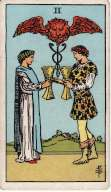

Card Name: minor_arcana_cups_2_thumb
Sentiment Score: 0.12591785192489624


In [6]:
#V0.0.0.6 GEMATRON



RULE = {(1, 1, 1): 0, (1, 1, 0): 0, (1, 0, 1): 0, (1, 0, 0): 1, (0, 1, 1): 1, (0, 1, 0): 1, (0, 0, 1): 1, (0, 0, 0): 0}

def rule_30(current_generation, generations=7):
    key_binary = ""
    # We'll save all generations in a list for the visualization
    all_generations = [current_generation]
    for _ in range(generations):
        next_generation = []
        for i in range(len(current_generation)):
            left = current_generation[i - 1] if i > 0 else 0
            center = current_generation[i]
            right = current_generation[(i + 1) % len(current_generation)]
            next_generation.append(RULE[(left, center, right)])
        key_binary += ''.join(map(str, next_generation))
        all_generations.append(next_generation) # Save the generation
        current_generation = next_generation

    # Visualization of the automaton
    plt.imshow(np.array(all_generations), cmap="binary", interpolation="none")
    plt.show()

    key_hex = hex(int(key_binary[:28], 2))[2:].zfill(7)
    return key_hex


# define search function



import urllib.parse
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup




async def fetch_search_results(query, max_results=20):
    content = ""
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        search_url = f"https://www.bing.com/search?q={urllib.parse.quote(query)}&PC=U316&FORM=CHROMN"
        await page.goto(search_url)
        await page.wait_for_selector(".b_algo")

        # Loop through the search results
        for i in range(max_results):
            link_element = await page.query_selector(f".b_algo:nth-child({i + 1}) h2 a")

            # If there's no link found, continue to next iteration
            if not link_element:
                continue

            link = await link_element.get_attribute("href")
            await page.goto(link)

            # Get the content of the <main> element, and if not found, get the content of the <body> element
            main_content_element = await page.query_selector("main") or await page.query_selector("body")
            content = await main_content_element.inner_text() if main_content_element else ""

            if content:
                break

        await browser.close()
        return content if content else "No suitable content found. The application will not proceed."


        

    
def generate_gpt2_response(seed_text, max_length=512, temperature=1.5, num_return_sequences=1):
    """
    Generates a response using the GPT-2 model.
    
    Parameters:
        seed_text (str): The seed text for generation.
        max_length (int): The maximum length of the generated text.
        temperature (float): The temperature for controlling randomness in generation.
        num_return_sequences (int): The number of sequences to return.
    
    Returns:
        str: The generated text or an error message.
    """

    # Validate inputs
    if not seed_text or max_length <= 0 or temperature <= 0 or num_return_sequences <= 0:
        return "Invalid parameters. Check your inputs."

    try:
        input_ids = gpt2_tokenizer.encode(seed_text, return_tensors="pt")
        output = gpt2_model.generate(input_ids, max_length=max_length, num_return_sequences=num_return_sequences, temperature=temperature)
        generated_text = gpt2_tokenizer.decode(output[0], skip_special_tokens=True)

        # Check if the generated text is the same as the seed text
        if generated_text.strip() == seed_text.strip():
            return "Generated text is the same as seed. Try again."

        return generated_text
    except Exception as e:
        return str(e)


#gematria script translation

def simple_gematria_with_total(word):
    word = word.upper()
    
    # Define the gematria mapping for English gematria
    gematria_mapping = {
        'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9,
        'J': 10, 'K': 20, 'L': 30, 'M': 40, 'N': 50, 'O': 60, 'P': 70, 'Q': 80, 'R': 90,
        'S': 100, 'T': 200, 'U': 300, 'V': 400, 'W': 500, 'X': 600, 'Y': 700, 'Z': 800
    }
    
    results, total = [], 0
    for letter in word:
        if letter in gematria_mapping:
            results.append((letter, gematria_mapping[letter]))
            total += gematria_mapping[letter]
    return results, total

async def gematria_lookup(number):
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        lookup_url = f"https://www.gematrix.org/?word={number}"
        await page.goto(lookup_url)

        # Extract content from the page
        content_element = await page.query_selector("body")
        if content_element:
            full_content = await content_element.inner_text()
            target_text = "Gematria Words And Phrases Of"
            target_index = full_content.find(target_text)
            if target_index != -1:
                content = full_content[target_index + len(target_text):]
            else:
                content = "Target text not found"
        else:
            content = "Body element not found"

        await browser.close()
        return content
    
    

    
    


async def main():
    # Initialize the tokenizer
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    # 1. Get an input by the user, as text.
    text = input("Enter your text: ").strip()
    print(f"Got input: {text}")

    # 2. Tokenize the input using the GPT2 tokenizer from Transformers
    print("Tokenizing input...")
    inputs = gpt2_tokenizer.encode(text, return_tensors="pt", max_length=50, truncation=True)
    max_length = 50
    print(f"Tokenized input: {inputs}")

    # 3. Do the web search with the terms.
    search_results = await fetch_search_results(text)
    print(f"Web search results: {search_results}")

    # 4. Get the data from the search’s tokenise the data.
    print("Tokenizing first search result...")
    search_result_text = search_results if search_results else ""
    search_result_tokenized = gpt2_tokenizer.encode(search_result_text, return_tensors="pt")

    # 5. Pass the tokenized data to the cellular automata as seed.
    print("Creating seed for cellular automata...")
    hash_object = hashlib.md5(search_result_text.encode())
    hex_dig = hash_object.hexdigest()
    seed_value = int(hex_dig, 16) % 256
    pattern = [int(b) for b in format(seed_value, '08b')] * 8

    # 6. Get the result from automata.
    print("Running cellular automata...")
    key = rule_30(pattern)
    print(f"7-Character Key: {key}")

    # 7. Turn both data into a seed back into as many words as the seed allows using the language model.
    print("7. Generating GPT-2 response...")
    combined_seed = f"{key} {gpt2_tokenizer.decode(search_result_tokenized[0])}"[:max_length]
    response_from_gpt2 = generate_gpt2_response(combined_seed, max_length)
    print(f"GPT-2 Output: {response_from_gpt2}")

    # 8. Turn the words into gematria number.
    print("Calculating gematria...")
    gematria_values, total_value = simple_gematria_with_total(response_from_gpt2)
    if gematria_values:
        gematria_formula = ", ".join([f"{pair[0]}: {pair[1]}" for pair in gematria_values])
        print(f"Gematria: {gematria_formula} | Total: {total_value}")

        # 9. Lookup the gematria number on gematrix.org
        print("Looking up gematria value on gematrix.org...")
        gematrix_result = await gematria_lookup(total_value)
        print(f"Gematrix.org Result: {gematrix_result}")
    else:
        print(" Gematria: No valid letters found.")
        
     # Directory path
    dir_path = './tarot'
    images = os.listdir(dir_path)
    
    
    # use total_value as tarot draw seed
    secretsGenerator = secrets.SystemRandom()
    secretsGenerator.seed(total_value)

    # Utilize CSPRNG
    # rng = random.SystemRandom()
    # selected_card = rng.choice(images)
    selected_card = secretsGenerator.choice(images)


    # Open and display the selected image
    image_path = os.path.join(dir_path, selected_card)
    image = PILImage.open(image_path)
    display(image)

    # Output the card name
    card_name = os.path.splitext(selected_card)[0]
    print('Card Name:', card_name)
    
    #sentiment score 
    #sia = SentimentIntensityAnalyzer()
    #sentiment_result = sia.polarity_scores(gematrix_result)
    #sentiment_score = sentiment_result['compound']
    #print(f"Gematria Sentiment Score: {sentiment_score}")



    # Tokenize the input
    inputs = tokenizer(gematrix_result, return_tensors="pt", max_length=512, truncation=True)

    # Predict the sentiment
    outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=-1)

    # Get the sentiment score; the result will depend on how the model was fine-tuned
    sentiment_score = probs[0][1].item() - probs[0][0].item()

    print(f"Sentiment Score: {sentiment_score}")



await main()